In [1]:
%config IPCompleter.greedy=True

## Part I: Preprocessing and EDA

- The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the **Orders** dataset and do some basic EDA. 
- For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with to conduct some plots and also provide **brief interpretations** about your findings.

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [2]:
import pandas as pd
orders = pd.read_csv('../data/Orders.csv', index_col=0, parse_dates=True)

In [3]:
#Convert to numeric
##Removal of "$" and "," from data frame, convert to numeric
orders['Profit'] = pd.to_numeric(orders['Profit'].str.replace('$', '').str.replace(',',''))
orders['Sales'] = pd.to_numeric(orders['Sales'].str.replace('$', '').str.replace(',',''))
#Display Profit and Sales to check
orders.loc[:, ['Profit','Sales']]

,Profit,Sales
Row.ID,,
40098,62.15,221.98
26341,-288.77,3709.40
25330,919.97,5175.17
13524,-96.54,2892.51
47221,311.52,2832.96
...,...,...
29002,4.50,65.10
34337,3.34,16.72
31315,2.48,8.56


### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

In [4]:
#pd.set_option('display.max_columns', None)
# Create new column 'Season': Spring runs from March 1 to May 31; Summer runs from June 1 to August 31; 
# Fall (autumn) runs from September 1 to November 30; and. Winter runs from December 1 to February 28 (February 29 in a leap year).
######
# group by Categories, Season -> sum Quantity
# ifelse(orders['Order.Date'] >= 'March 1' and orders['Order.Date'] <= 'May31', ''

In [5]:
#Group and sort order dates by seasons
##set index to order dates 
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
orders = orders.set_index(orders['Order.Date'])

##Create of bins to specify between season points 
bins = [0, 91, 183, 275, 366]
labels=['Winter', 'Spring', 'Summer', 'Fall']
doy = orders.index.dayofyear
orders['Season'] = pd.cut(doy + 11 - 366*(doy > 355), bins=bins, labels=labels)



In [6]:
#Group by Seasons, Cateogory, then aggregate a sum labeled Quanitity 
season_trend = orders.groupby(['Season','Category']).agg({'Quantity':['sum']})


In [7]:
season_trend['Quantity']

sum
Season Category              
Winter Furniture         6083
       Office Supplies  18440
       Technology        6192
Spring Furniture         7524
       Office Supplies  24359
       Technology        7698
Summer Furniture         9243
       Office Supplies  29547
       Technology        9567
Fall   Furniture        12042
       Office Supplies  35898
       Technology       11719

In [8]:
season_trend = season_trend.reset_index()

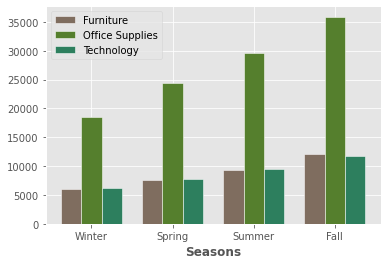

In [9]:
######## Maybe we should use a line chart for this ########
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = np.array(season_trend[season_trend['Category']=='Furniture']['Quantity']['sum']) #furniture
bars2 = np.array(season_trend[season_trend['Category']=='Office Supplies']['Quantity']['sum'])
bars3 = np.array(season_trend[season_trend['Category']=='Technology']['Quantity']['sum'])
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Furniture')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Office Supplies')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Technology')
 
# Add xticks on the middle of the group bars
plt.xlabel('Seasons', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Winter', 'Spring', 'Summer', 'Fall'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [10]:
# import seaborn as sns
# sns.catplot(x="Season", y="Quantity", hue="Category", kind="bar", data=season_trend)

### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?


	2. How many customer returned more than once? more than 5 times?


	3. Which regions are more likely to return orders?


	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [24]:
returns = pd.read_csv('../data/Returns.csv', index_col=0)
returns.columns = ['Order.ID', 'Region']

In [25]:
returns

,Order.ID,Region
Returned,,
Yes,CA-2012-SA20830140-41210,Central US
Yes,IN-2012-PB19210127-41259,Eastern Asia
Yes,CA-2012-SC20095140-41174,Central US
Yes,IN-2015-JH158207-42140,Oceania
Yes,IN-2014-LC168857-41747,Oceania
...,...,...
Yes,IN-2014-DA1345058-41769,Southern Asia
Yes,US-2013-HG14845140-41530,Eastern US
Yes,US-2013-SJ2021582-41543,Central America


In [26]:
orders

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Season
Order.Date,,,,,,,,,,,,,,,,,,,,,
2014-11-11,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High,Fall
2014-02-05,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical,Winter
2014-10-17,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium,Fall
2014-01-28,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium,Winter
2014-11-05,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-19,IN-2015-KE1642066-42174,2015-06-19,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,Hiroshima,...,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium,Spring
2014-05-06,US-2014-ZD21925140-41765,2014-05-06,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,Tennessee,...,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High,Spring
2012-08-26,CA-2012-ZD21925140-41147,2012-08-26,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,...,Office Supplies,Art,Newell 341,8.56,2,0.0,2.48,1.580,High,Summer


In [27]:
#returned_orders = pd.merge(orders, returns, on = 'Order.ID')
returned_orders = orders.merge(returns, left_on='Order.ID', right_on='Order.ID')
returned_orders

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Season,Region_y
0,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,...,Tables,"Lesro Conference Table, with Bottom Storage",1715.16,2,0.0,720.36,725.570,Critical,Fall,Eastern Asia
1,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,...,Bookcases,"Safco Classic Bookcase, Pine",2197.50,5,0.0,153.75,627.270,Critical,Fall,Eastern Asia
2,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,...,Tables,"Lesro Round Table, with Bottom Storage",1356.03,3,0.0,311.85,458.970,Critical,Fall,Eastern Asia
3,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,...,Chairs,"Office Star Swivel Stool, Adjustable",882.15,5,0.0,114.60,203.920,Critical,Fall,Eastern Asia
4,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,Taipei City,...,Machines,"Okidata Calculator, Red",148.32,3,0.0,68.22,25.480,Critical,Fall,Eastern Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,CA-2014-WB21850140-41654,2014-01-15,1/21/14,Standard Class,WB-218501406,William Brown,Consumer,10011.0,New York City,New York,...,Binders,"Square Ring Data Binders, Rigid 75 Pt. Covers,...",49.54,3,0.2,17.34,2.670,Medium,Winter,Eastern US
2216,CA-2014-WB21850140-41654,2014-01-15,1/21/14,Standard Class,WB-218501406,William Brown,Consumer,10011.0,New York City,New York,...,Envelopes,"#10 Gummed Flap White Envelopes, 100/Box",16.52,4,0.0,7.60,1.690,Medium,Winter,Eastern US
2217,US-2013-SJ2021582-41543,2013-09-26,9/29/13,First Class,SJ-2021582,Sarah Jordon,Consumer,NaN,Hermosillo,Sonora,...,Furnishings,"Deflect-O Clock, Black",181.12,9,0.4,-75.56,1.085,Medium,Fall,Central America
2218,CA-2012-ZC21910140-41271,2012-12-28,1/4/13,Standard Class,ZC-219101402,Zuschuss Carroll,Consumer,60610.0,Chicago,Illinois,...,Furnishings,Tenex Chairmats For Use with Hard Floors,38.98,3,0.6,-50.67,5.290,Low,Winter,Central US


In [28]:
returned_orders['Order.ID']

0       IN-2012-PB19210127-41259
1       IN-2012-PB19210127-41259
2       IN-2012-PB19210127-41259
3       IN-2012-PB19210127-41259
4       IN-2012-PB19210127-41259
                  ...           
2215    CA-2014-WB21850140-41654
2216    CA-2014-WB21850140-41654
2217     US-2013-SJ2021582-41543
2218    CA-2012-ZC21910140-41271
2219      EG-2014-PM894038-41846
Name: Order.ID, Length: 2220, dtype: object

In [29]:
#Create Year column, extract year from Order.Date
returned_orders['Year'] = pd.DatetimeIndex(returned_orders['Order.Date']).year

In [30]:
#TOTAL PROFIT BY YEAR
#group by year and aggregate a sum of Profits
#This will show us the total profits made by that year
Total_Profit = returned_orders.groupby(['Year']).agg({"Profit":['sum']})
Total_Profit

,Profit
,sum
Year,
2012,17477.26
2013,9269.89
2014,17510.63
2015,17112.97


In [34]:
#Now lets compare how much was lost 
#Filter only products that had a loss
Profit_loss = returned_orders[['Year', 'Profit']]

Profit_loss['Profit'] = returned_orders[returned_orders['Profit'] < 0]['Profit']
Profit_loss.dropna()

Profit_Loss_table = Profit_loss.groupby(['Year']).agg({"Profit":['sum']})
Profit_Loss_table


<ipython-input-34-8d4bf8897078>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Profit_loss['Profit'] = returned_orders[returned_orders['Profit'] < 0]['Profit']


,Profit
,sum
Year,
2012,-5772.54
2013,-7713.03
2014,-7439.43
2015,-15907.60


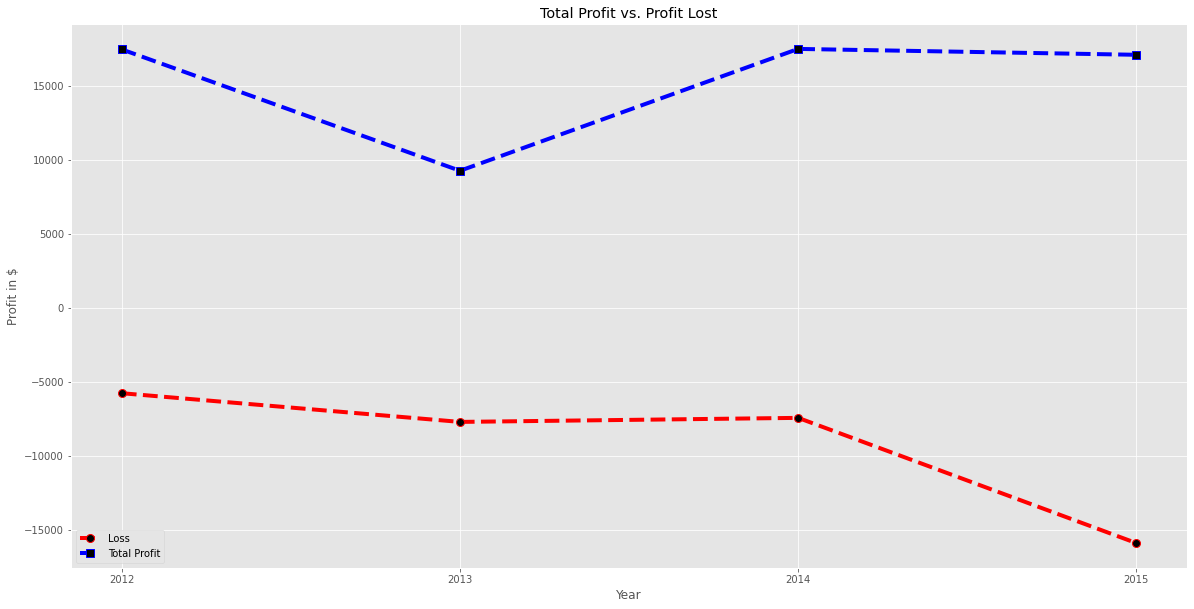

In [35]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
x = [2012, 2013, 2014, 2015]
plt.figure(figsize=(20,10))
# multiple line plot
plt.plot( x, 'Profit', data=Profit_Loss_table, marker='o', markerfacecolor='black', markersize=8, color='red', linewidth=4, linestyle = 'dashed', label = "Loss")
plt.plot( x, 'Profit', data=Total_Profit, marker='s', markerfacecolor='black', markersize=8, color='blue', linewidth=4, linestyle = 'dashed', label = "Total Profit")
plt.xticks(x)
plt.xlabel('Year')
plt.ylabel('Profit in $') 
plt.title('Total Profit vs. Profit Lost')
plt.legend()

In [37]:
# 2. How many customer returned more than once? more than 5 times?
returned_orders_customer = returned_orders.groupby(['Customer.ID','Order.ID']).agg({"Order.ID":['count']})

In [38]:
returned_orders_customer = returned_orders_customer.reset_index()
returned_orders_customer

Customer.ID                  Order.ID      
                                             count
0       AA-1031558   IN-2015-AA1031558-42361     1
1     AA-106451404  CA-2015-AA10645140-42314     1
2       AA-1064559   ID-2015-AA1064559-42332     3
3       AA-1064564   ES-2012-AA1064564-41268     1
4        AA-645137    UP-2014-AA645137-41807     1
...            ...                       ...   ...
1076  WB-218501406  CA-2014-WB21850140-41654     3
1077    WB-2185064   ES-2013-WB2185064-41587     1
1078    YS-2188093   MX-2012-YS2188093-41060     1
1079  ZC-219101402  CA-2012-ZC21910140-41271     1
1080    ZD-2192548   IT-2013-ZD2192548-41503     1

[1081 rows x 3 columns]

In [39]:
returned_orders_customer[returned_orders_customer['Order.ID']['count']>1]['Customer.ID'].size
# How many customer returned more than once? 551

551

In [40]:
returned_orders_customer[returned_orders_customer['Order.ID']['count']>5]['Customer.ID'].size
# How many customer returned more than 5 times? 41

41

In [41]:
# 3. Which regions are more likely to return orders?
returned_orders_regions = pd.DataFrame(returns.groupby(['Region']).size())


In [42]:
(returned_orders_regions / returned_orders_regions[0].sum() * 100).round(2).sort_values([0], ascending=False)

,0
Region,
Western Europe,11.21
Central America,10.84
Oceania,7.23
Western US,6.67
Eastern US,6.39
Southeastern Asia,5.93
South America,5.65
Southern Asia,5.38
Southern Europe,5.10


In [288]:
# 4. Which categories (sub-categories) of products are more likely to be returned?
returned_categories = pd.DataFrame(returned_orders.groupby(['Category','Sub.Category']).size()) #agg({"count"})

In [284]:
# returned_categories = returned_categories.reset_index()

In [291]:
(returned_categories / returned_categories[0].sum() * 100).round(2).sort_values([0], ascending=False)

0
Category        Sub.Category       
Office Supplies Binders       12.12
                Art            9.77
                Storage        9.55
                Paper          6.76
Furniture       Chairs         6.62
Technology      Phones         6.53
                Accessories    6.22
Office Supplies Labels         6.17
Furniture       Furnishings    6.08
                Bookcases      4.68
Office Supplies Supplies       4.64
                Fasteners      4.59
                Envelopes      4.46
Technology      Copiers        4.46
                Machines       2.84
Office Supplies Appliances     2.66
Furniture       Tables         1.85